# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction
Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, I should decide what question i want to answer in this analysis.

- What is the total number of trips per day in a specfic city?
- which gender is likely to ride bikes often Males or Females or Other?

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, I will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).


In [5]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # Library to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [6]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader =csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


The helper functions in the code cells below to address each of the cleaning tasks described above.

In [7]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    """
    
    # YOUR CODE HERE
    if city == "Chicago" or city == "NYC":
        duration = int(datum['tripduration']) / 60
    else:
        duration = (int(datum['Duration (ms)'])/(1000 * 60)) % 60
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [8]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.

    """
    
    # YOUR CODE HERE
    # Deciding the format of the timestamp based on the city name
    if city == "Washington":
        formatted_date = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
        month = int(formatted_date.strftime("%#m"))
        hour = int(formatted_date.strftime("%#H"))
        day_of_week = str(formatted_date.strftime("%A"))
    elif city == "Chicago":
        formatted_date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
        month = int(formatted_date.strftime("%#m"))
        hour = int(formatted_date.strftime("%#H"))
        day_of_week = str(formatted_date.strftime("%A"))
    else:
        formatted_date = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S')
        month = int(formatted_date.strftime("%#m"))
        hour = int(formatted_date.strftime("%#H"))
        day_of_week = str(formatted_date.strftime("%A"))
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [9]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    # Deciding the value which will be read from the record based on the city name.
    if city != "Washington":
        user_type = datum['usertype']
    else:
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

Question 3b: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the /examples/ folder, you will see an example datafile from the Bay Area Bike Share before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [10]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.

    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            month, hour, day_of_week=time_of_trip(row, city)

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [11]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the /examples/ folder. Modify the cells to answer the question below.

Question 4a: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: Highest number of trips is: NYC city.
            Highest proportion of trips made by subscribers: NYC city.
            Highest proportion of trips made by short-term customers: Chicago city.

In [12]:
def cyclist_segment(row):
    """
    This function reads in a file with trip data and returns what is the segment of
    the cyclist.
    """
    #Deciding the value of Cyclist_type variable based on user_type value.
    if row['user_type'] == 'Subscriber':
        cyclist_type='Subscriber'
    else:
        cyclist_type='Customer'
        
        #return the type of the subscriber wether he is a Subscriber or a Customer
    return(cyclist_type)

In [13]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            cyclist_type=cyclist_segment(row)
            if cyclist_type == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        proportion_subscribers = (n_subscribers/n_total) * 100
        proportion_customers = (n_customers/n_total) * 100
        
        # return tallies as a tuple
        return(n_subscribers,n_customers,n_total,proportion_subscribers, proportion_customers)

In [14]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

NYC_file = './data/NYC-2016-Summary.csv'
print(number_of_trips(NYC_file))

Washington_file = './data/Washington-2016-Summary.csv'
print(number_of_trips(Washington_file))

Chicago_file = './data/Chicago-2016-Summary.csv'
print(number_of_trips(Chicago_file))

BAY_AREA = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(BAY_AREA))

(245896, 30902, 276798, 88.83590199351151, 11.164098006488485)
(51753, 14573, 66326, 78.0282242257938, 21.971775774206193)
(54982, 17149, 72131, 76.22520136973007, 23.774798630269924)
(5666, 633, 6299, 89.95078583902206, 10.049214160977932)


Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: Average trip length for each city as the follwoing:
            1- NYC: 15.81259299802294
            2- Washington: 14.219789700620257
            3- Chicago: 16.563629368787335
            
            Proportions of rides which are longer than 30 minutes as the following:
            1- NYC: 7.3024371563378345
            2- Washington: 7.981786931218526
            3- Chicago: 8.332062497400562
            

In [15]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def average_trip_length(filename):
    """
    This function reads a CSV file and calculate the average trip length
    from data within the input file
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize count variables
        n_trips = 0
        n_trips_length = 0
        
        # Sum all duration's values into n_trips_length variable
        for row in reader:
            n_trips += 1
            n_trips_length += float(row['duration'])
            
        # Calculating the average of trips length and return it.
        avg_trip_len = n_trips_length / n_trips
        return (avg_trip_len)
            
    
def long_trips(filename):
    """
    This function reads a CSV file and calculate the number of trips which exceeded the 30 minutes.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize count variables
        n_trips = 0
        n_long_trips = 0
        percentage = 0
        
        # Sum all duration's values into n_trips_length variable
        for row in reader:
            n_trips += 1
            if float(row['duration']) > 30:
                n_long_trips += 1
        
         # Calculating the proportation average of trips length which are longer than 30 minutes and return it.
        percentage = (n_long_trips / n_trips) * 100
        return(n_long_trips, percentage)
    
    
    




In [16]:
NYC_file = './data/NYC-2016-Summary.csv'
#print(average_trip_length(NYC_file))
print(long_trips(NYC_file))

Washington_file = './data/Washington-2016-Summary.csv'
#print(average_trip_length(Washington_file))
print(long_trips(Washington_file))

Chicago_file = './data/Chicago-2016-Summary.csv'
#print(average_trip_length(Chicago_file))
print(long_trips(Chicago_file))

(20213, 7.3024371563378345)
(5294, 7.981786931218526)
(6010, 8.332062497400562)


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: The chosen city is NYC, and it seems that Customers are taking longer rides on average with 32.2 minutes meanwhile 
            Subscriber's average duration is 13.68 minutes.

In [17]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##

def trip_duration_ridership(filename):
    """
    This function reads a CSV file and reports longer rides (duration more than 30) on average
    based on ridership only in NYC City.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        #Call "number_of_trips" function to get number of trips for each segment and total trips
        # for a city.
        n_subscriber,n_customer, n_total, prop_subscriber, prop_customer = number_of_trips(filename)
        
        #Initialize count varaibles
        total_subscriber_duration = 0
        total_customer_duration = 0
        
        # Sum all duration's values into total_subscriber_duration,total_customer_duration variables based on the value of cyclist_type whether
        # its 'Subscriber' or 'Customer'
        for row in reader: 
            cyclist_type=cyclist_segment(row)
            if cyclist_type == "Subscriber":
                total_subscriber_duration += float(row['duration'])
            else:
                total_customer_duration += float(row['duration'])
            
    # Calculating the average of trips length for both segments and return them.        
    avg_duration_subscriber = (total_subscriber_duration/n_subscriber)
    avg_duration_customer = (total_customer_duration/n_customer)
    return(avg_duration_subscriber,avg_duration_customer)
            


In [18]:
NYC_file = './data/NYC-2016-Summary.csv'
#NYC_file = './examples/BayArea-Y3-Summary.csv'
#print(average_trip_length(NYC_file))
print(trip_duration_ridership(NYC_file))

(13.680790523907177, 32.77595139473187)


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

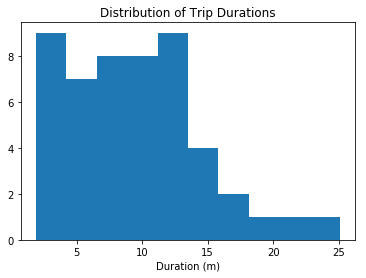

In [19]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [20]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

def plot_durations(filename):
    """
    This function reads a CSV file and saves every duration for each trip in a list, then we use this
    list to plot it using matplotlib Library.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        #Initialize an empty list
        data_list=[]
        
        # ADD the value of duration for each reacord into data_list List.
        for row in reader:
            data_list.append(row['duration'])
            
        # Using the data_list List to generate a Histogram     
        plt.hist(data_list)
        plt.title('Distribution of Trip Durations')
        plt.xlabel('Duration (m)')
        plt.show()
        

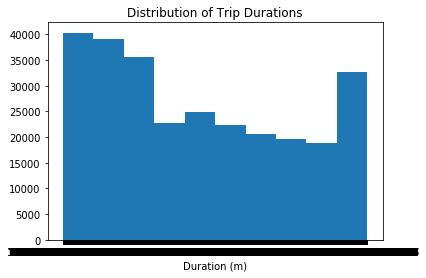

None


In [21]:
NYC_file = './data/NYC-2016-Summary.csv'
print(plot_durations(NYC_file))

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: The peak of Subscribers' distribution is between 5 and 10 minutes and The peak of Customers' distribution is between 20 and 25 minutes.
            Subscribers' distribution was started to imporving through the first interval(between 0 and 10 minutes) until it reached the peak point and then started to fall down in other intervals till reached its minimal point in interval (50-60 Min). 
            Customers' distribution was started to imporving through intervals (from 0 to 22 minutes) until it reached the peak point and then started to fall down in other intervals till it reached its minimal point in interval (65-70 Min).

In [22]:
## Use this and additional cells to answer Question 5. ##
def conditional_plotting(filename, City):
    
    """
    This function reads a CSV file and saves every duration for each trip in a list based on the ridership
    and the trip duration must be less than 75 minutes for both segments,
    then we use this list to plot it using matplotlib Library within 15 intervals ONLY.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        #Initialize empty lists
        subscriber_list=[]
        customer_list=[]
        seq = []
        
        for row in reader:
            cyclist_type=cyclist_segment(row)
            if cyclist_type == "Subscriber" and float(row['duration']) < 75:
                subscriber_list.append(float(row['duration']))
            elif cyclist_type == "Customer" and float(row['duration']) < 75:
                customer_list.append(float(row['duration']))
        for x in range(75):
            if x % 5 == 0:
                seq.append(x)
        # Using the subsciber_list List to generate a Histogram with bars have 5 minutes wide intervals. 
        plt.hist(subscriber_list,bins=seq)
        title = "Distribution of Subscribers\' Trips Durations in {} City".format(city)
        plt.title(title)
        plt.xlabel('Duration (m)')
        plt.show()
        
        # Using the customer_list List to generate a Histogram with bars have 5 minutes wide intervals.
        plt.hist(customer_list,bins=seq)
        title = "Distribution of Customers\' Trips Durations in {} City".format(city)
        plt.title(title)
        plt.xlabel('Duration (m)')
        plt.show()

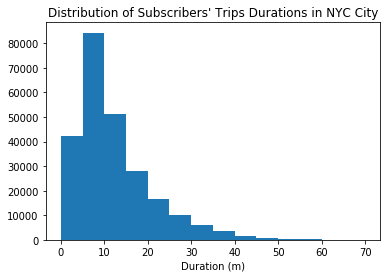

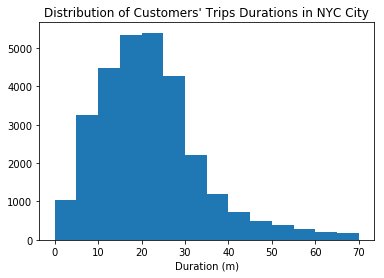

None


In [23]:
# Test conditional_plotting function 
NYC_file = './data/NYC-2016-Summary.csv'
print(conditional_plotting(NYC_file, "NYC"))

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: The choosen question is: "Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?", and the choosen city is "Chicago".

The results shown that the pattern of ridership differs based on the day of the week in Chicago city. Both segments prefer to cycle in weekends more than in weekdays. Thus, the average duration of trips which made in weekends is slightly more than the average duration of the trips  in weekdays for both segments Subscibers & Customers.Also,The advanced analysis shows that duration of trips which are done by 'customers' in weekends more than the duration of the trips done by 'Subscribesrs' which is represented in the below two visualizations.

In [24]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##
def ridership_advanced_analysis(filename, city ='Chicago'):
    """
    This function reads a CSV file and returns the number of trips within Weekends and within Weekdays based on ridership.
    Also, this function produces two visulaizations based on the cyclist segment.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        #Initialize empty lists and count variables
        weekends_subscriber_list=[]
        subs_count_weekends=0
        weekdays_subscriber_list=[]
        subs_count_weekdays=0
        weekends_customer_list=[]
        cuss_count_weekends=0
        weekdays_customer_list=[]
        cuss_count_weekdays=0
        
        
        for row in reader:
            #Deciding type of cyclist whether it is Subscriber or Customer
            cyclist_type=cyclist_segment(row)
            
            #Deciding the day of week the trip was taken, and in what list the value will be put into.
            if cyclist_type == "Subscriber":
                if row['day_of_week']=='Saturday' or row['day_of_week']=='Sunday':
                    weekends_subscriber_list.append(float(row['duration']))
                    subs_count_weekends += 1
                else:
                    weekdays_subscriber_list.append(float(row['duration']))
                    subs_count_weekdays += 1
                    
            if cyclist_type == "Customer":
                if row['day_of_week']=='Saturday' or row['day_of_week']=='Sunday':
                    weekends_customer_list.append(float(row['duration']))
                    cuss_count_weekends += 1
                else:
                    weekdays_customer_list.append(float(row['duration']))
                    cuss_count_weekdays += 1
        
        #Calculating AVGs for each segment in each category of the week
        subscriber_weekends_avg = float(sum(weekends_subscriber_list)) / subs_count_weekends
        
        subscriber_weekdays_avg = float(sum(weekdays_subscriber_list)) /subs_count_weekdays
        
        customer_weekends_avg = float(sum(weekdays_customer_list)) / cuss_count_weekends 

        customer_weekdays_avg = float(sum(weekdays_customer_list)) / cuss_count_weekdays 
        
        # Visual the two subscriber_weekends_avg, customer_weekends_avg variables in compare with the duration
        plt.hist(subscriber_weekends_avg)
        title = "Distribution of Customers\' Trips Durations in {} City".format(city)
        plt.title(title)
        plt.xlabel('Duration (m)')
        plt.show()
        
        plt.hist(customer_weekends_avg)
        title = "Distribution of Customers\' Trips Durations in {} City".format(city)
        plt.title(title)
        plt.xlabel('Duration (m)')
        plt.show()
        
        # return four variables which are:subscriber_weekends_avg, subscriber_weekdays_avg,
        # customer_weekends_avg, customer_weekdays_avg
        return (subscriber_weekends_avg, subscriber_weekdays_avg, customer_weekends_avg, customer_weekdays_avg)
        

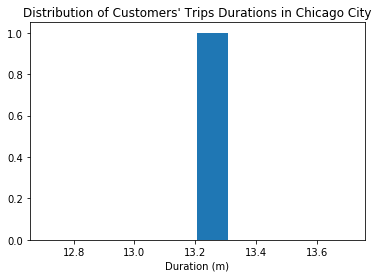

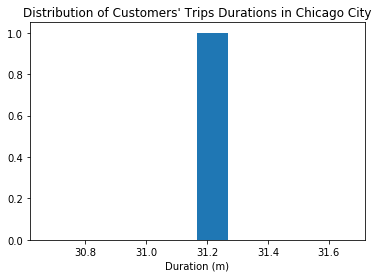

(13.207232078204227, 11.78052040181478, 31.168803468885663, 30.86854688950805)


In [25]:
# Test ridership_advanced_analysis function 

Chicago_file = './data/Chicago-2016-Summary.csv'
print(ridership_advanced_analysis(Chicago_file))

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: How much would it be important to use the techniques of data science with the autonomous cars when they are available in the market?

### Resources: ###
##### www.stackoverflow.com #####